In [14]:
# Main imports and preparations
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


from netCDF4 import Dataset

# Constants
fill_byte = 255
fill_short = -32767
fill_int = -2147483647

fill_float = 9.9692099683868690e+36
fill_double = 9.9692099683868690e+36

# Set main folders
main_folder = '/home/andresd/Documents/Recursos_Hidraulicos/Copernicus_Data/ERA5_Monthly_Single_Level'


In [17]:
# Read main file
input_file = "/".join((main_folder, 'Raw', 'ERA5_Single_Level_V1.nc'))
dataset = Dataset(input_file, 'r')
print(dataset.variables.keys())


odict_keys(['longitude', 'latitude', 'expver', 'time', 'u100', 'v100', 'u10', 'v10', 't2m', 'e', 'd2m', 'sp', 'tcc', 'tp'])


In [19]:
# Dimensional data
lons = np.array(dataset.variables['longitude'][:])
lats = np.array(dataset.variables['latitude'][:])
times = np.array(dataset.variables['time'][:])
dates= pd.to_datetime([datetime(1900, 1, 1) + timedelta(hours=int(i)) for i in times])


In [20]:
lats

array([15.  , 14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  ,
       12.75, 12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75,
       10.5 , 10.25, 10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,
        8.25,  8.  ,  7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,
        6.  ,  5.75,  5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,
        3.75,  3.5 ,  3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,
        1.5 ,  1.25,  1.  ,  0.75,  0.5 ,  0.25,  0.  , -0.25, -0.5 ,
       -0.75, -1.  , -1.25, -1.5 , -1.75, -2.  , -2.25, -2.5 , -2.75,
       -3.  , -3.25, -3.5 , -3.75, -4.  , -4.25, -4.5 , -4.75, -5.  ,
       -5.25, -5.5 , -5.75, -6.  , -6.25, -6.5 , -6.75, -7.  ],
      dtype=float32)

In [21]:
lons

array([-82.  , -81.75, -81.5 , -81.25, -81.  , -80.75, -80.5 , -80.25,
       -80.  , -79.75, -79.5 , -79.25, -79.  , -78.75, -78.5 , -78.25,
       -78.  , -77.75, -77.5 , -77.25, -77.  , -76.75, -76.5 , -76.25,
       -76.  , -75.75, -75.5 , -75.25, -75.  , -74.75, -74.5 , -74.25,
       -74.  , -73.75, -73.5 , -73.25, -73.  , -72.75, -72.5 , -72.25,
       -72.  , -71.75, -71.5 , -71.25, -71.  , -70.75, -70.5 , -70.25,
       -70.  , -69.75, -69.5 , -69.25, -69.  , -68.75, -68.5 , -68.25,
       -68.  , -67.75, -67.5 , -67.25, -67.  , -66.75, -66.5 , -66.25,
       -66.  , -65.75, -65.5 , -65.25, -65.  ], dtype=float32)

In [6]:
dates

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', length=498, freq=None)

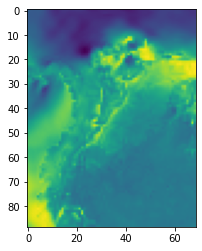

In [22]:
# Check downloades data
plt.imshow(np.array(dataset.variables['e'][0, 0, :, :]))


In [24]:
# PASS FILE TO INDIVIDUAL ANNUAL FILES

# Target variables
variables_dict = {'Evapotranspiration': 'e', 'Precipitation': 'tp', 'Tempreature':'t2m', 'Cloud Cover': 'tcc', 'Dew Point': 'd2m', 'Surface Air Pressure': 'sp', 'Wind Speed U10': 'u10', 'Wind Speed V10': 'v10', 'Wind Speed U100': 'u100', 'Wind Speed V100': 'v100'}
variables_dict_standard = {'Evapotranspiration': 'etr', 'Precipitation': 'pcp', 'Tempreature':'t2m', 'Cloud Cover': 'tcc', 'Dew Point': 'd2m', 'Surface Air Pressure': 'sp', 'Wind Speed U10': 'u10', 'Wind Speed V10': 'v10', 'Wind Speed U100': 'u100', 'Wind Speed V100': 'v100'}

# Read netCDF dataset and variables of interest
copernicus_time = dataset.variables['time']

# get unique years list
times = np.array(copernicus_time[:])
dates = pd.to_datetime([datetime(1900, 1, 1) + timedelta(hours=int(i)) for i in times])
years = pd.unique([i.year for i in dates])

# create one file per year
for variable in variables_dict:
    variabe_dataset = dataset.variables[variables_dict[variable]][:, 0, :, :]
    output_folder = "/".join((main_folder, 'Processed', variable, 'Monthly/'))
    for year in years:
        # NetCDF dataset name
        output_nc = "".join((output_folder, variable, '_', str(year), '.nc'))

        # Create NETCDF4 base files where each variable data will be stored
        rootgrp = Dataset(output_nc, 'w', format='NETCDF4')
        rootgrp.createDimension('time', None)       # Dimension 1 size
        rootgrp.createDimension('lat', len(lats))   # Dimension 2 size
        rootgrp.createDimension('lon', len(lons))   # Dimension 3 size

        # Time dimension
        nc_times = rootgrp.createVariable('time', 'f8', ('time',))
        nc_times.units = copernicus_time
        nc_times.calendar = 'standard'
        nc_times[:] = times[:]

        # Y dimension [latitudes]
        latitude = rootgrp.createVariable('lat', 'f4', ('lat'))
        latitude.units = 'degrees_north'
        latitude.standard_name = 'latitude'
        latitude [:] = lats

        # X dimension [longitudes]
        longitude = rootgrp.createVariable('lon', 'f4', ('lon'))
        longitude.units = 'degrees_east'
        longitude.standard_name = 'longitude'
        longitude [:] = lons

        # Create container variable for CRS: lon/lat WGS84 datum
        crs = rootgrp.createVariable('crs', 'i4')
        crs.long_name = 'lat/lon coordinates in WGS84'
        crs.grid_mapping_name = 'latitude_longitude'
        crs.longitude_of_prime_meridian = 0.0
        crs.semi_major_axis = 6378137.0
        crs.inverse_flattening = 298.257223563

        # Create precipitation variable and pass the array into it
        nc_dataset = rootgrp.createVariable(variables_dict_standard[variable], np.float32, \
        ('time', 'lat', 'lon',), fill_value=fill_float)
        nc_dataset[:, :, :] = variabe_dataset[:, :, :]
        nc_dataset.long_name = dataset.variables[variables_dict[variable]].long_name
        nc_dataset.units = dataset.variables[variables_dict[variable]].units
        nc_dataset.grid_mapping = "crs"

        # Add global attributes
        rootgrp.Description = 'Copernicus'
        rootgrp.History = 'Converted ' + time.ctime(time.time())
        rootgrp.Source = 'NetCDF4 python module'
        rootgrp.Conventions = 'CF-1.6'

        rootgrp.close()


PermissionError: [Errno 13] Permission denied: b'/home/andresd/Documents/Recursos_Hidraulicos/Copernicus_Data/ERA5_Monthly_Single_Level/Processed/Evapotranspiration/Monthly/Evapotranspiration_1979.nc'

In [11]:
Dataset(output_nc, 'w', format='NETCDF4')

PermissionError: [Errno 13] Permission denied: b'/home/andresd/Documents/Recursos_Hidraulicos/Copernicus_Data/ERA5_Monthly_Single_Level/Processed/Evapotranspiration/Monthly/Evapotranspiration 1979.nc'

In [13]:
time

array([ 692496,  693240,  693912,  694656,  695376,  696120,  696840,
        697584,  698328,  699048,  699792,  700512,  701256,  702000,
        702696,  703440,  704160,  704904,  705624,  706368,  707112,
        707832,  708576,  709296,  710040,  710784,  711456,  712200,
        712920,  713664,  714384,  715128,  715872,  716592,  717336,
        718056,  718800,  719544,  720216,  720960,  721680,  722424,
        723144,  723888,  724632,  725352,  726096,  726816,  727560,
        728304,  728976,  729720,  730440,  731184,  731904,  732648,
        733392,  734112,  734856,  735576,  736320,  737064,  737760,
        738504,  739224,  739968,  740688,  741432,  742176,  742896,
        743640,  744360,  745104,  745848,  746520,  747264,  747984,
        748728,  749448,  750192,  750936,  751656,  752400,  753120,
        753864,  754608,  755280,  756024,  756744,  757488,  758208,
        758952,  759696,  760416,  761160,  761880,  762624,  763368,
        764040,  764

In [69]:
variable = 'Precipitation'
variabe_dataset = dataset.variables[variables_dict[variable]][dates.year == 2020, 0, :, :]
dataset.variables[variables_dict[variable]].units

'm'

In [73]:
rootgrp = Dataset(output_nc, 'w', format='NETCDF4')

PermissionError: [Errno 13] Permission denied: b'/home/andresd/Documents/Recursos_Hidraulicos/Copernicus_Data/ERA5_Monthly_Single_Level/Processed/Evapotranspiration/Monthly/Evapotranspiration 1979.nc'